In [14]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict , Literal

In [3]:
class QuadraticState(TypedDict):
    a:int 
    b :int
    c : int

    equation : str
    discriminant : float
    result : str

In [4]:
def show_equation(state:QuadraticState)->QuadraticState:
    equation = f'{state['a']}x^2 +{state['b']}x + {state['c']}'
    return {"equation" : equation}

In [5]:
def calculate_discriminant(state:QuadraticState)->QuadraticState:
    d = state['b'] **2 - 4 * state['a'] * state['c']
    return {"discriminant": d} 

In [6]:
def real_root(state:QuadraticState)->QuadraticState:
    root1 = (-state['b'] + (state['discriminant'])**0.5 ) / (state['a'] *2)
    root2 = (-state['b'] - (state['discriminant'])**0.5 ) / (state['a'] *2)
    result = f'The roots are {root1} and {root2}'
    return {'result':result}

In [10]:
def repeted_roots(state:QuadraticState)->QuadraticState:
    root = -state['b'] / (state['a'] * 2 )
    result = f'Only Repeating Roots are {root}'
    return {'result':result}

In [11]:
def no_real_roots(state:QuadraticState)->QuadraticState:
    result = "No real Roots"
    return {'result':result}

In [15]:
def check_condition(state:QuadraticState)->Literal["real_root","repeted_roots" , "no_real_roots"]:
    if state['discriminant'] >0 :
        return "real_root"
    elif state['discriminant'] == 0:
        return "repeted_roots"
    else:
        return "no_real_roots"

In [16]:
graph = StateGraph(QuadraticState)

graph.add_node("show_equation" , show_equation)
graph.add_node("calculate_discriminant" , calculate_discriminant)
graph.add_node("real_root" , real_root)
graph.add_node('repeted_roots' , repeted_roots)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START , "show_equation")
graph.add_edge("show_equation" , "calculate_discriminant")

graph.add_conditional_edges('calculate_discriminant' , check_condition)

graph.add_edge('real_root' , END)
graph.add_edge('repeted_roots' , END)
graph.add_edge('no_real_roots' , END)


workflow = graph.compile()

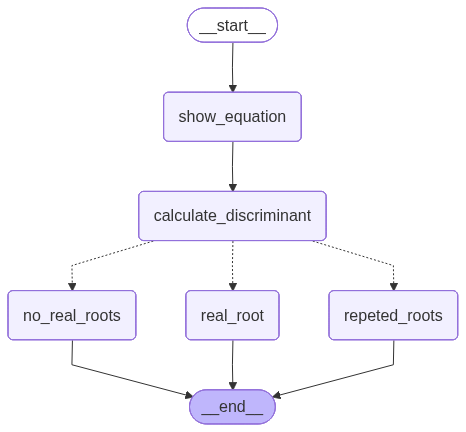

In [22]:
workflow

In [20]:
initial_state = QuadraticState(a=1 , b=1, c= 4)
final_state = workflow.invoke(initial_state)
print(final_state)

{'a': 1, 'b': 1, 'c': 4, 'equation': '1x^2 +1x + 4', 'discriminant': -15, 'result': 'No real Roots'}
